# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

from itertools import islice

# This uses the implementation of take from the itertools recipes:
# http://docs.python.org/library/itertools.html#recipes
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# Location of the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
# Output file for hyperparameters used and loss counts
# Only create if it doesn't exist, it is an appending log.
import json
import os
DATA_FILENAME = "testrun.output.json"
if (not os.path.isfile(DATA_FILENAME)):
    with open(DATA_FILENAME, mode='w', encoding='utf-8') as f:
        json.dump([], f)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print ("Set of ytrain labels", set(y_train))


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Set of ytrain labels {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42}


In [4]:
import csv
signs_names=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_names.append((row['SignName']))

print ("Sign name[0], sign name [27]", signs_names[0], signs_names[27])

Sign name[0], sign name [27] Speed limit (20km/h) Pedestrians


### Show a sample of each type of image

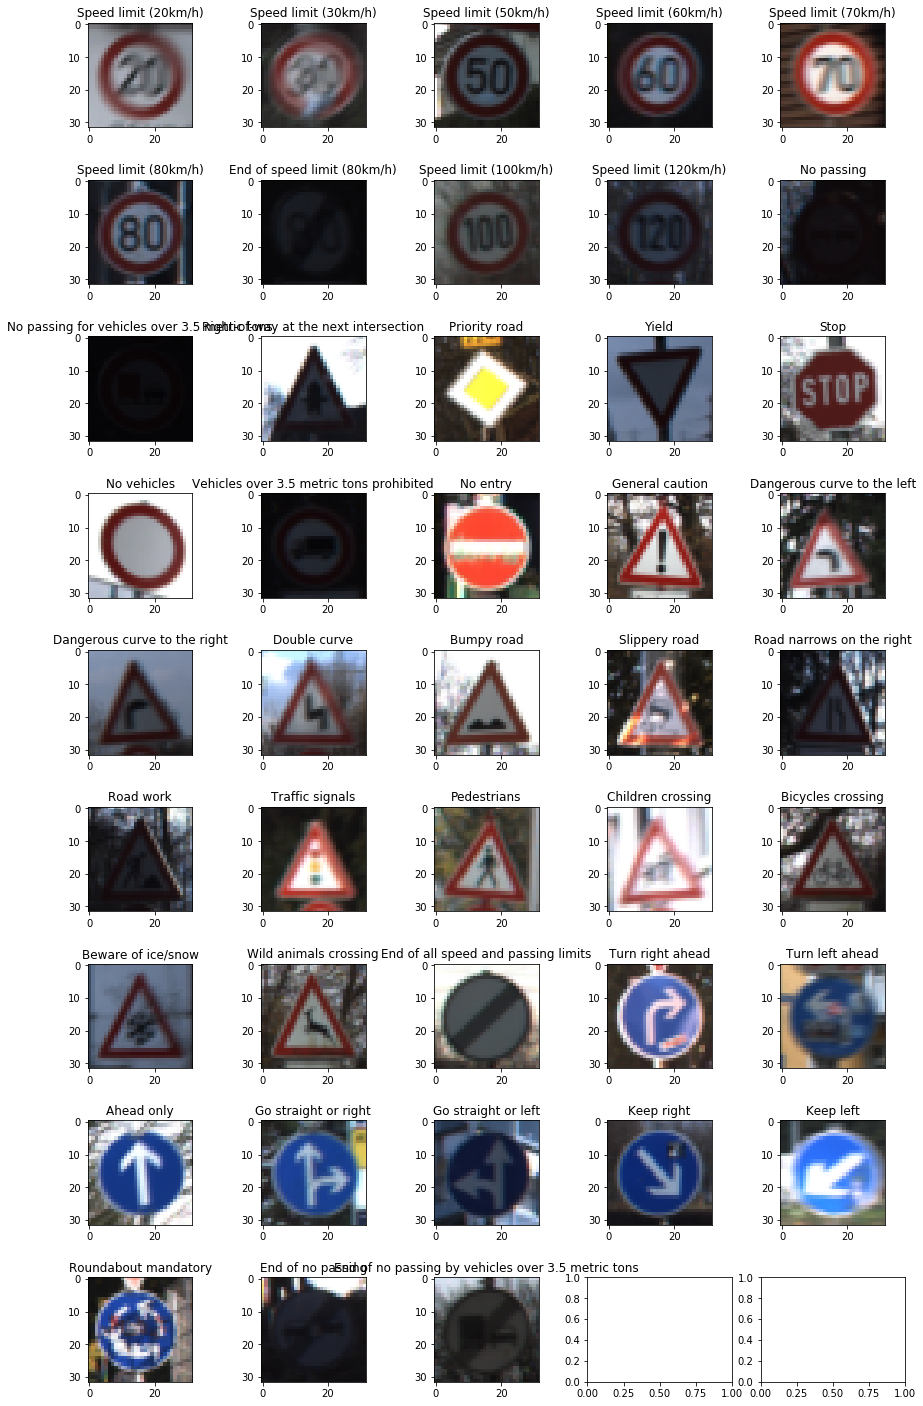

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_col = 5
f, axarr = plt.subplots(n_classes // n_col + 1, n_col, figsize=(15, 25))

for iclass in range(n_classes):
    count = 0
    for y in range(len(y_train)):
        if (y_train[y] == iclass):
            image = X_train[y].squeeze()
            #print (index // n_col, index % n_col, y, signs_names[iclass])
            axarr[iclass // n_col, iclass % n_col].imshow(image)
            axarr[iclass // n_col, iclass % n_col].set_title(signs_names[iclass])

#fig.tight_layout()
f.subplots_adjust(hspace=.5)

plt.show()


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

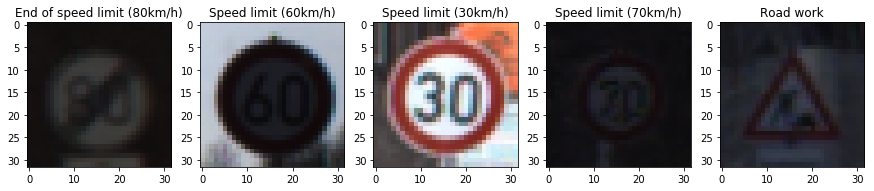

In [6]:
# Random sample of 5 images

display_n = 5
labels = []
plt.figure(figsize=(15, 15))

for i in range(display_n):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    ax.set_title(signs_names[y_train[index]])
    
plt.show()


### Histogram of y labels for Training, Validation and Test sets
The distribution of sign types does match well across all 3 sets.

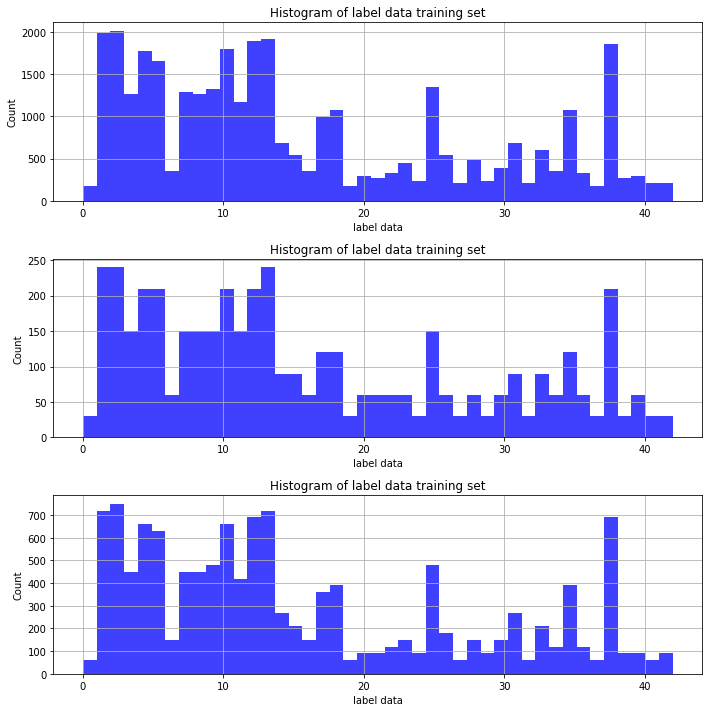

In [7]:
# Counts of images by label
%matplotlib inline
fig,arr = plt.subplots(3, figsize=(10, 10))
#histogram of the data
arr[0].hist(y_train, n_classes, facecolor='b', alpha=0.75)
arr[0].set_xlabel('label data')
arr[0].set_ylabel('Count')
arr[0].set_title('Histogram of label data training set')
arr[0].grid(True)
#
arr[1].hist(y_valid, n_classes, facecolor='b', alpha=0.75)
arr[1].set_xlabel('label data')
arr[1].set_ylabel('Count')
arr[1].set_title('Histogram of label data training set')
arr[1].grid(True)
#
arr[2].hist(y_test, n_classes, facecolor='b', alpha=0.75)
arr[2].set_xlabel('label data')
arr[2].set_ylabel('Count')
arr[2].set_title('Histogram of label data training set')
arr[2].grid(True)

fig.tight_layout()
plt.show()

### Histogram of RGB values(combined) across all images in the training set
The distribution is also show below for the normalized values.

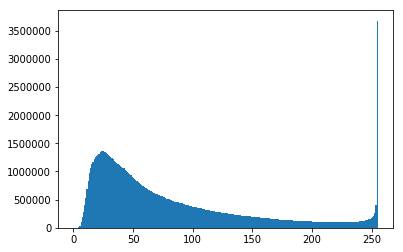

In [8]:
bin_counts, bin_edges, patches = plt.hist(X_train.ravel(), bins=256, range=(0.0, 255.0))
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
import tensorflow as tf

# Collect hyperparams in a dictionary, later will iterate over varients

hyperparam = {}
hyperparam['dropout'] = 'fc5fc6'
hyperparam['conv'] = '5x5'
hyperparam['EPOCHS'] = 20
hyperparam['BATCH_SIZE'] = 128
hyperparam['learning_rate'] = .0005


In [10]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# I had also tested black and white images on early runs prior to recording 
# the results for each run.  The BW conversion did not seem to significantly 
# help training, but I also had not tested with dropout yet.

def preprocess_images(images):
    return (images - 128.) / 128.

X_train_norm = preprocess_images(X_train)
X_valid_norm = preprocess_images(X_valid)
X_test_norm = preprocess_images(X_test)

# brightness normalization would likley be useful here


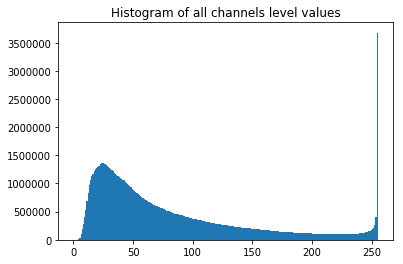

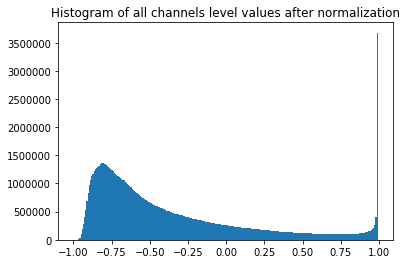

In [11]:
### Compare historgrams of RGB values before and after normalization

#print(np.histogram(X_train, bins=20))
#print(np.histogram(X_train_norm, bins=20))

plt.hist(X_train.ravel(), bins=256)
plt.title('Histogram of all channels level values')
plt.show()
plt.hist(X_train_norm.ravel(), bins=256)
plt.title('Histogram of all channels level values after normalization')
plt.show()

### Model Architecture

layer 1 - convolutional nn 5x5, relu activation

layer 2 - max pooling layer 2x2 (1, 2, 2, 1)

layer 3 - convolutional nn 5x5, relu activation

layer 4 - max pooling layer 2x2 (1, 2, 2, 1)

layer 5 - fully connected layer 120 output

    Optional dropout layer - use and keep_prob passed as parameter
    
layer 6 - fully connected layer 84 output

    Optional dropout layer - use and keep_prob passed as parameter
    
layer 7 - fully connected layer n_classes(43) output

In [12]:
### I used my lenet like model from an earlier homework submission.  I did
### add an optional dropout after fully connected layers 5 and 6.


from tensorflow.contrib.layers import flatten

logit_config = {}

# Start with my LeNet architecture....
#
def LeNet(x, dropout='fc5fc6'):
    global logit_config
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    l1w = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    l1b = tf.Variable(tf.zeros([1, 28, 28, 6]))
   
    print ("x", x.get_shape())

    conv_l1 = tf.nn.conv2d(x, l1w, strides=[1, 1, 1, 1], padding='VALID') + l1b                 
    
    # TODO: Activation.
    conv_l1 = tf.nn.relu(conv_l1)
    print ("conv_l1", conv_l1.get_shape())

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    pool_l2 = tf.nn.max_pool(conv_l1, ksize, strides, padding)
    print ("pool_l2", pool_l2.get_shape())

    # TODO: Layer 3: Convolutional. Output = 10x10x16.
    l3w = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    l3b = tf.Variable(tf.zeros([1, 10, 10, 16]))

    conv_l3 = tf.nn.conv2d(pool_l2, l3w, strides=[1, 1, 1, 1], padding='VALID') + l3b

    # TODO: Activation.
    conv_l3 = tf.nn.relu(conv_l3)
    print ("conv_l3", conv_l3.get_shape())

    # TODO: Pooling. l4 Input = 10x10x16. Output = 5x5x16.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    padding = 'VALID'
    pool_l4 = tf.nn.max_pool(conv_l3, ksize, strides, padding)
    print ("conv_l3 max", pool_l4.get_shape())

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat400 = tf.reshape(pool_l4, [-1, 5 * 5 * 16]) 
    # flat400 = flatten(pool_l4)

    
    # TODO: Layer 5: Fully Connected. Input = 400. Output = 120.
    l5w = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    l5b = tf.Variable(tf.zeros([1, 120]))
    
    full_l5 = tf.matmul(flat400, l5w) + l5b
    
    # TODO: Activation.
    full_l5 = tf.nn.relu(full_l5)
    if ('fc5' in dropout):
        full_l5_drop = tf.nn.dropout(full_l5, keep_prob)
        full_l5 = full_l5_drop
    print ("full_l5", full_l5.get_shape())

    # TODO: Layer 6: Fully Connected. Input = 120. Output = 84.
    l6w = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    l6b = tf.Variable(tf.zeros([1, 84]))
    
    full_l6 = tf.matmul(full_l5, l6w) + l6b
    # TODO: Activation.
    full_l6 = tf.nn.relu(full_l6)
    if ('fc6' in dropout):
        full_l6_drop = tf.nn.dropout(full_l6, keep_prob)
        full_l6 = full_l6_drop
    print ("full_l6", full_l6.get_shape())


    # TODO: Layer 7: Fully Connected. Input = 84. Output = 10.
    l7w = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    l7b = tf.Variable(tf.zeros([1, n_classes]))
    
    full_l7 = tf.matmul(full_l6, l7w) + l7b
    print ("full_l7", full_l7.get_shape())

    
    logits = full_l7
  
    # Save model references to use in the optional exercise of visualizing layers
    logit_config = {
        "conv_l1" : conv_l1,
        "pool_l2" : pool_l2,
        "conv_l3" : conv_l3,
        "pool_l4" : pool_l4,
        "full_l5" : full_l5,
        "full_l6" : full_l6,
        "full_l7" : full_l7,
        "logits" : logits
    }
    return logits

In [13]:
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Utility functions to help manage log of runs(model training)

In [14]:
def append_log_entry(entry):
    with open(DATA_FILENAME, mode='r', encoding='utf-8') as feedsjson:
        feeds = json.load(feedsjson)
    with open(DATA_FILENAME, mode='w', encoding='utf-8') as feedsjson:
        feeds.append(entry)
        json.dump(feeds, feedsjson)

def check_already_ran(hyperparams):
    with open(DATA_FILENAME, mode='r', encoding='utf-8') as feedsjson:
        feeds = json.load(feedsjson)
    for feed in feeds:
        #print (feed['hyperparam'])
        if len(hyperparams) != len(feed['hyperparam']):
            continue
        unmatched_item = set(hyperparams.items()) ^ set(feed['hyperparam'].items())
        #print ("differ by file %s arg %s unmatched %s" % (feed['hyperparam'], hyperparams, unmatched_item))
        if len(unmatched_item) == 0:
            return True
    return False

            

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
import time

def train_network(hyperparam, forcerun=False):
    if not forcerun and check_already_ran(hyperparam):
        print ("Already have run with hyperparams:", hyperparam)
        return
    rate = hyperparam['learning_rate']
    # check on learning rate decay: ie:
    # https://ireneli.eu/2016/03/13/tensorflow-04-implement-a-lenet-5-like-nn-to-classify-notmnist-images/

    logits = LeNet(x)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)



    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

    def evaluate(X_data, y_data):
        num_examples = len(X_data)
        total_accuracy = 0
        total_loss = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, hyperparam['BATCH_SIZE']):
            batch_x, batch_y = X_data[offset:offset+hyperparam['BATCH_SIZE']], y_data[offset:offset+hyperparam['BATCH_SIZE']]
            loss, accuracy = sess.run([loss_operation, accuracy_operation], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
            total_loss += (loss * len(batch_x))
            total_accuracy += (accuracy * len(batch_x))
        return (total_loss / num_examples, total_accuracy / num_examples)



    train_time_list = []
    train_loss_list = []
    validation_loss_list = []

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        global X_train_norm
        global y_train
        num_examples = len(X_train_norm)

        print("Training...", hyperparam)
        print()
        for i in range(hyperparam['EPOCHS']):
            start_time = time.time()
            X_train_norm, y_train = shuffle(X_train_norm, y_train)
            for offset in range(0, num_examples, hyperparam['BATCH_SIZE']):
                end = offset + hyperparam['BATCH_SIZE']
                batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: hyperparam['keep_prob']})

            train_loss, train_accuracy = evaluate(X_train_norm, y_train)
            validation_loss, validation_accuracy = evaluate(X_valid_norm, y_valid)
            train_loss_list.append(train_loss)
            validation_loss_list.append(validation_loss)
            elapsed_time = time.time() - start_time
            train_time_list.append(elapsed_time)

            print ("EPOCH {} ...".format(i+1))
            print ("Training loss: ", train_loss)
            print ("Training Accuracy = {:.3f}".format(train_accuracy))
            print ("Validation loss: ", validation_loss)
            print ("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print ("time:", elapsed_time)
            print ()

        saver.save(sess, './lenet')
        print("Model saved")

    print ("Training loss: ", train_loss_list)
    print ("Validation loss: ", validation_loss_list)

    plt.subplot(1,1,1)
    plt.plot(train_loss_list, 'b', label='T Loss')
    plt.plot(validation_loss_list, 'r', label='V Loss')
    plt.legend(loc=1)
    plt.show()

    # Create a log entry to store results and parameters used
    entry = {'name': "a list of features?",
         'hyperparam': hyperparam,
         'train_loss': train_loss_list,
         'valid_loss': validation_loss_list,
         'train_time' : train_time_list,
         'total_time' : sum(train_time_list),
         'validation_accuracy': validation_accuracy,
         'notes': "eh"}
    append_log_entry(entry)
    # returns values to use on test images later
    return saver, logits

x (?, 32, 32, 3)
conv_l1 (?, 28, 28, 6)
pool_l2 (?, 14, 14, 6)
conv_l3 (?, 10, 10, 16)
conv_l3 max (?, 5, 5, 16)
full_l5 (?, 120)
full_l6 (?, 84)
full_l7 (?, 43)
Training... {'keep_prob': 0.7, 'conv': '5x5', 'BATCH_SIZE': 64, 'EPOCHS': 20, 'learning_rate': 0.0005, 'dropout': 'fc5fc6'}

EPOCH 1 ...
Training loss:  0.898835454735
Training Accuracy = 0.760
Validation loss:  1.08348910626
Validation Accuracy = 0.694
time: 46.767500162124634

EPOCH 2 ...
Training loss:  0.385593167043
Training Accuracy = 0.897
Validation loss:  0.566568996812
Validation Accuracy = 0.832
time: 52.84228992462158

EPOCH 3 ...
Training loss:  0.244877530305
Training Accuracy = 0.935
Validation loss:  0.440758289543
Validation Accuracy = 0.866
time: 62.04550099372864

EPOCH 4 ...
Training loss:  0.167306391625
Training Accuracy = 0.955
Validation loss:  0.353194395916
Validation Accuracy = 0.899
time: 58.832271099090576

EPOCH 5 ...
Training loss:  0.115881384381
Training Accuracy = 0.971
Validation loss:  0.310

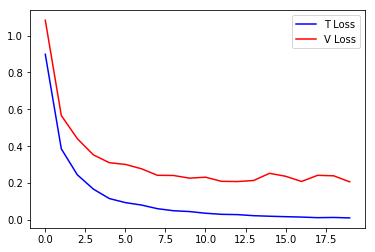

In [16]:
hyperparam = {}
hyperparam['dropout'] = 'fc5fc6'
hyperparam['conv'] = '5x5'
hyperparam['EPOCHS'] = 20
hyperparam['BATCH_SIZE'] = 64
hyperparam['learning_rate'] = .0005
hyperparam['keep_prob'] = 0.7

run_batch = False

if run_batch == True:
    for batch in [128, 256, 64]:
        for learn in [.001, .0005, .0001, .005]:
            for param_keep_prob in [0.5, 0.6, 0.7]:
                for dropout in ['fc5fc6', 'fc6', 'none']:
                    hyperparam['dropout'] = dropout
                    hyperparam['BATCH_SIZE'] = batch
                    hyperparam['learning_rate'] = learn
                    hyperparam['keep_prob'] = param_keep_prob
                    train_network(hyperparam)

saver, logits = train_network(hyperparam, forcerun=True)

In [17]:
# Code to plot individual loss plots for each run.  Deprecated in favor of
# the gang plots below.

#with open(DATA_FILENAME, mode='r', encoding='utf-8') as feedsjson:
#    feeds = json.load(feedsjson)
#for feed in feeds:
#    plt.subplot(1,1,1)
#    plt.plot(feed['train_loss'], 'b', label='T Loss')
#    plt.plot(feed['valid_loss'], 'r', label='V Loss')
#    plt.title('HyperParams: ' + str(feed['hyperparam']))
#    plt.legend(loc=1)
#    plt.show()



### Learning rate:
The following graphs strongly suggest a learning rate of 0.0001 is too small.  None of the 0.0001 runs converge to a steady loss by epoch 20.  It also suggests an adaptive learning rate would be useful as 0.005 starts very well for the first 2-5 epochs.

The format includes all runs in gray with a low alpha to allow visibility.

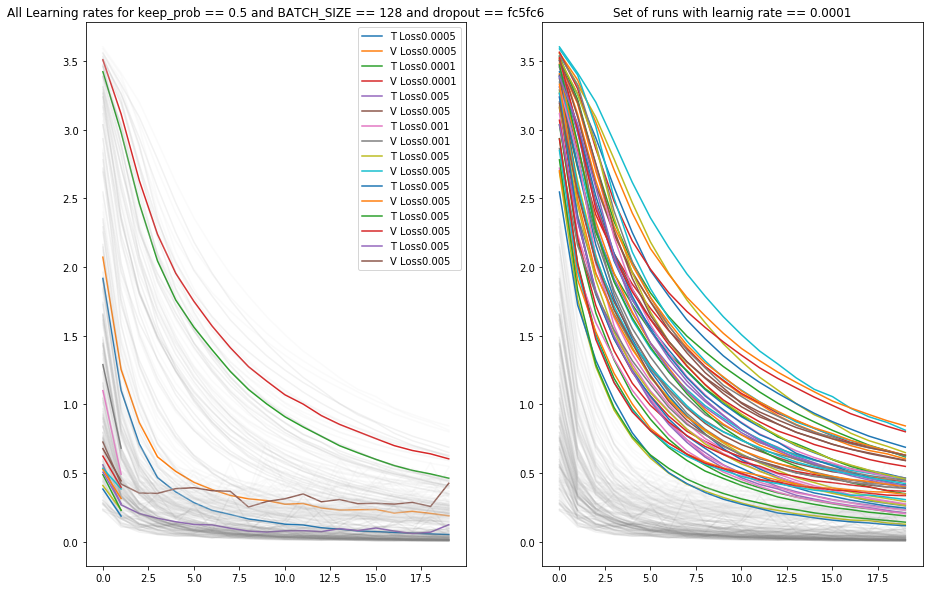

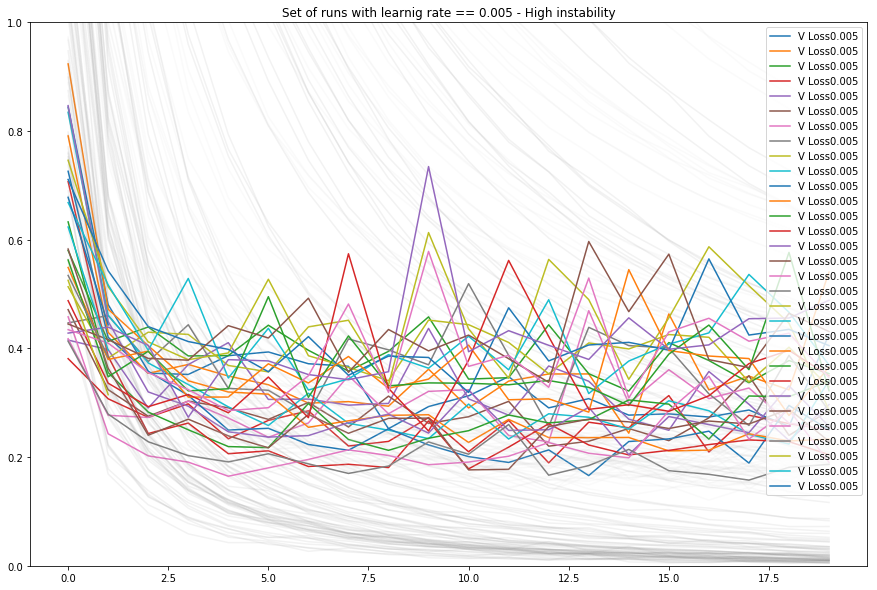

In [18]:

with open(DATA_FILENAME, mode='r', encoding='utf-8') as feedsjson:
    feeds = json.load(feedsjson)
    
    plt.subplots(1,2, figsize=(15, 10))

    plt.subplot(1,2,1)

    for feed in feeds:
        hyperparam = feed['hyperparam']        
        if hyperparam['keep_prob'] == 0.5 and hyperparam['BATCH_SIZE'] == 128 and hyperparam['dropout'] == 'fc5fc6':
            plt.plot(feed['train_loss'], label='T Loss' + str(hyperparam['learning_rate']))
            plt.plot(feed['valid_loss'], label='V Loss' + str(hyperparam['learning_rate']))
        else:
            plt.plot(feed['train_loss'], 'grey', alpha = 0.1)
            plt.plot(feed['valid_loss'], 'lightgrey', alpha = 0.1)            
    plt.legend(loc=1)
    plt.title("All Learning rates for keep_prob == 0.5 and BATCH_SIZE == 128 and dropout == fc5fc6")

    plt.subplot(1,2,2)
    for feed in feeds:
        hyperparam = feed['hyperparam']        
        if hyperparam['learning_rate'] == 0.0001:
            plt.plot(feed['train_loss'], label='T Loss' + str(hyperparam['learning_rate']))
            plt.plot(feed['valid_loss'], label='V Loss' + str(hyperparam['learning_rate']))
        else:
            plt.plot(feed['train_loss'], 'grey', alpha = 0.1)
            plt.plot(feed['valid_loss'], 'lightgrey', alpha = 0.1)

            
    plt.title("Set of runs with learnig rate == 0.0001")

    plt.show()
    
    f, ax = plt.subplots(1,1, figsize=(15, 10))

    # Show a plot of high learning rate
    for feed in feeds:
        hyperparam = feed['hyperparam']        
        if hyperparam['learning_rate'] == 0.005:
            #plt.plot(feed['train_loss'], label='T Loss' + str(hyperparam['learning_rate']))
            plt.plot(feed['valid_loss'], label='V Loss' + str(hyperparam['learning_rate']))
        else:
            plt.plot(feed['train_loss'], 'grey', alpha = 0.1)
            plt.plot(feed['valid_loss'], 'lightgrey', alpha = 0.1)

    plt.legend(loc=1)
    ax.set_ylim([0.0,1.0])

    plt.title("Set of runs with learnig rate == 0.005 - High instability")
    plt.show()


### This provides a list of all the runs sorted by the final validation accuracy

In [19]:
print ("List of hyperparameter experiments sorted by validation accuracy")
with open(DATA_FILENAME, mode='r', encoding='utf-8') as feedsjson:
    feeds = json.load(feedsjson)
    feeds_sorted = sorted(feeds, key=lambda x: x['validation_accuracy'], reverse=True)
    for feed in feeds_sorted:
        if 'validation_accuracy' in feed.keys():
            print (str(feed['validation_accuracy']) + "\t" + str(feed['hyperparam'].values()))

List of hyperparameter experiments sorted by validation accuracy
0.9621315190310922	dict_values([0.5, '5x5', 20, 64, 0.001, 'fc5fc6'])
0.9621315187878079	dict_values([0.6, '5x5', 20, 64, 0.001, 'fc6'])
0.9619047619317935	dict_values([0.7, '5x5', 20, 64, 0.0005, 'fc5fc6'])
0.96122448982295	dict_values([0.7, '5x5', 20, 64, 0.0005, 'fc5fc6'])
0.9596371882086168	dict_values([0.6, '5x5', 20, 64, 0.001, 'none'])
0.9596371879653325	dict_values([0.7, '5x5', 20, 128, 0.001, 'none'])
0.9591836732261035	dict_values([0.5, '5x5', 20, 64, 0.001, 'fc5fc6'])
0.9589569160997733	dict_values([0.7, '5x5', 20, 256, 0.001, 'fc5fc6'])
0.9589569158835206	dict_values([0.7, '5x5', 20, 256, 0.005, 'none'])
0.9587301585139061	dict_values([0.6, '5x5', 20, 64, 0.001, 'fc5fc6'])
0.9585034016308601	dict_values([0.6, '5x5', 20, 256, 0.001, 'fc6'])
0.9585034013875758	dict_values([0.6, '5x5', 20, 128, 0.001, 'fc5fc6'])
0.9585034013605442	dict_values([0.6, '5x5', 20, 64, 0.0005, 'fc5fc6'])
0.958503400333344	dict_values([

### Plot of the configs with validation accuracy above 95.9%
Again results test to suggest an adaptive learning rate could help.


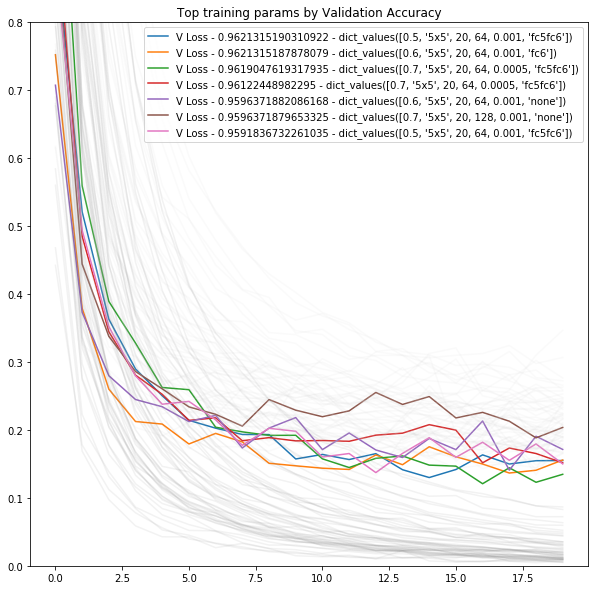

In [20]:
plt.subplots(1,1, figsize=(10, 10))

with open(DATA_FILENAME, mode='r', encoding='utf-8') as feedsjson:
    feeds = json.load(feedsjson)
    
    ax = plt.subplot()
    feeds_sorted = sorted(feeds, key=lambda x: x['validation_accuracy'], reverse=True)

    for feed in feeds_sorted:
        hyperparam = feed['hyperparam']
        if hyperparam['learning_rate'] == 0.0001 or hyperparam['learning_rate'] == 0.005:
            continue
        if feed['validation_accuracy'] > 0.959:
            #plt.plot(feed['train_loss'], label='T Loss' + str(feed['hyperparam'].values()))
            plt.plot(feed['valid_loss'], label='V Loss - ' + str(feed['validation_accuracy']) + ' - ' + str(feed['hyperparam'].values()))
        else:
            plt.plot(feed['train_loss'], 'grey', alpha = 0.1)
            plt.plot(feed['valid_loss'], 'lightgrey', alpha = 0.1)
            
    ax.set_ylim([0.0,0.8])

    plt.legend(loc=1)
    plt.title("Top training params by Validation Accuracy")

    plt.show()

### There is not a clear choice for drop out
There may be another way to graph this that would make the information clearer.  Generally the runs with dropout did perform better, but there was not a clear an obvious trend.

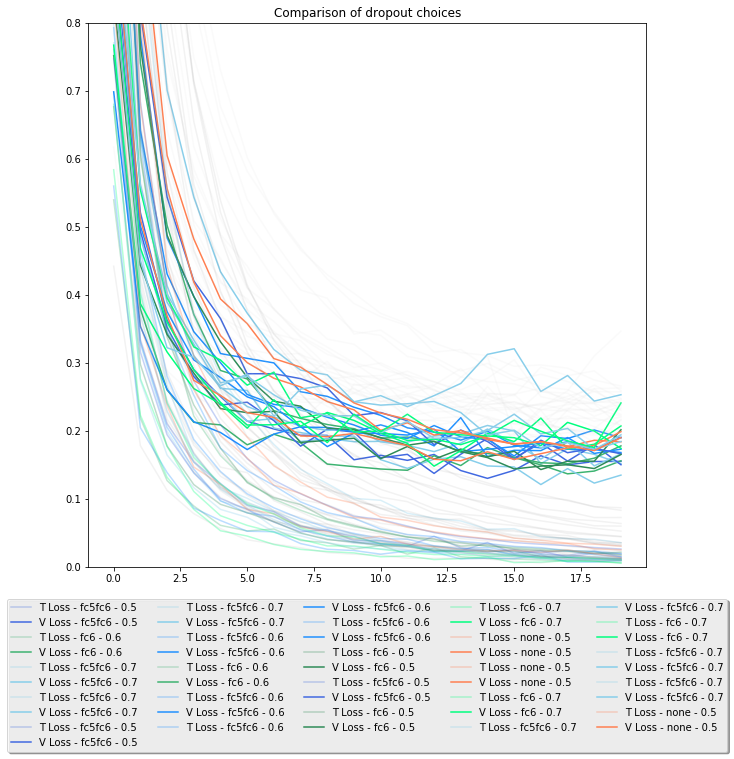

In [21]:
# Comparison of dropout success

plt.subplots(1,1, figsize=(10, 10))

with open(DATA_FILENAME, mode='r', encoding='utf-8') as feedsjson:
    feeds = json.load(feedsjson)
    
    ax = plt.subplot()
    feeds_sorted = sorted(feeds, key=lambda x: x['validation_accuracy'], reverse=True)

    for feed in feeds_sorted:
        hyperparam = feed['hyperparam']
        if hyperparam['learning_rate'] == 0.0001 or hyperparam['learning_rate'] == 0.005:
            continue
        #if hyperparam['learning_rate'] != 0.0005:
        #    continue
        if hyperparam['dropout'] == 'none' and hyperparam['keep_prob'] != 0.5:
            continue
        #print(hyperparam)
        if hyperparam['dropout'] == 'none':
            color = 'coral'
        elif hyperparam['dropout'] == 'fc6':
            if hyperparam['keep_prob'] == 0.5:
                color = 'seagreen'
            elif hyperparam['keep_prob'] == 0.6:
                color = 'mediumseagreen'
            else:
                color = 'springgreen'
        elif hyperparam['dropout'] == 'fc5fc6':
            if hyperparam['keep_prob'] == 0.5:
                color = 'royalblue'
            elif hyperparam['keep_prob'] == 0.6:
                color = 'dodgerblue'
            else:
                color = 'skyblue'
        else:
            print(hyperparam)

        if feed['validation_accuracy'] > 0.95:
            plt.plot(feed['train_loss'], color, label='T Loss - ' + hyperparam['dropout'] + ' - ' + str(hyperparam['keep_prob']), alpha=.3)
            plt.plot(feed['valid_loss'], color, label='V Loss - ' + hyperparam['dropout'] + ' - ' + str(hyperparam['keep_prob']))
        else:
            plt.plot(feed['train_loss'], 'grey', alpha = 0.1)
            plt.plot(feed['valid_loss'], 'lightgrey', alpha = 0.1)
            
    ax.set_ylim([0.0,0.8])

    plt.legend(loc=9, ncol=5, shadow=True, fancybox=True, bbox_to_anchor=(0.5, -0.05))
    plt.title("Comparison of dropout choices")

    plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [23]:
import cv2
import os
import matplotlib.image as mpimg
import glob

def show_list_images(images):
    #plt.figure(figsize=(10, 10))
    plt.subplots(len(images)//5+1, 5, figsize=(10, 10))
    for i, image in enumerate(images):
        n_col = 5
        n_row = len(images) // n_col
        if len(images) % n_col != 0:
            n_row += 1
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(image)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=.5)
    plt.show()


['test_images/1200px-UK_50_mph_speed_limit_sign_on_a_single-carriageway.png', 'test_images/2764561332.1.png', 'test_images/2764561332.2.png', 'test_images/Achenpass.png', 'test_images/B17-schild.png', 'test_images/Road_Sign_And_Winter_Scenery.png', 'test_images/Umleitung_Sackgasse_Anlieger_Frei_Baustelle_Pullach_im_Isartal.1.png', 'test_images/Umleitung_Sackgasse_Anlieger_Frei_Baustelle_Pullach_im_Isartal.3.png', 'test_images/Vollsperrung-waehrend-der-Sommerferien-Handorfs-Zufahrt-wird-geschlossen_image_630_420f_wn.1.png', 'test_images/Vollsperrung-waehrend-der-Sommerferien-Handorfs-Zufahrt-wird-geschlossen_image_630_420f_wn.2.png']


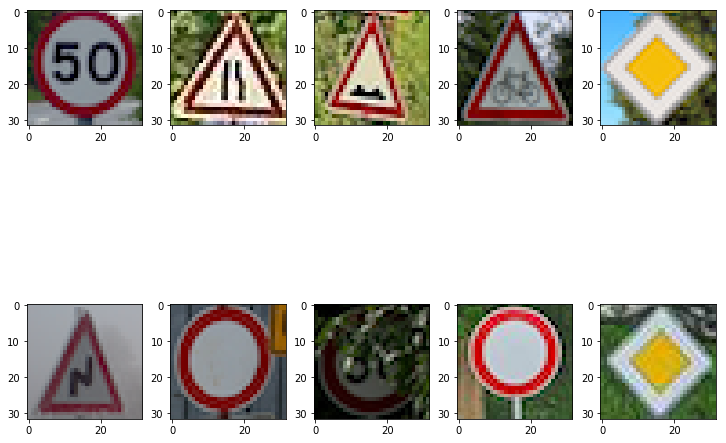

In [24]:
# All images are from wikimedia commons, with unrestricted public domain use.

#test_image_files = os.listdir("test_images/")
test_image_files = glob.glob("test_images/*.png")
print (test_image_files)
test_image_list = []
out_image_list = []
X_my_images = np.uint8(np.zeros((len(test_image_files),32,32,3)))
for i, test_image_file in enumerate(test_image_files):
    #if ".png" in test_image:
    #test_image = mpimg.imread(test_image_file)
    test_image = cv2.imread(test_image_file, cv2.IMREAD_COLOR)
    b,g,r = cv2.split(test_image)
    test_image = cv2.merge([r,g,b])
    test_image_list.append(test_image)
    X_my_images[i] = test_image

show_list_images(test_image_list)

### Predict the Sign Type for Each Image

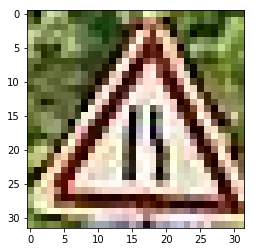

In [25]:

# Varify load of found images
n_my_images = len(test_image_list)
plt.imshow(X_my_images[1])
plt.show()

In [26]:
import tensorflow as tf

X_my_images_norm = preprocess_images(X_my_images)

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    sign_argmax = sess.run(tf.argmax(logits, 1), feed_dict={x: X_my_images_norm, keep_prob: 1.0})

sign labels: [ 1 24 29 29 12 28 15  2 15 12]


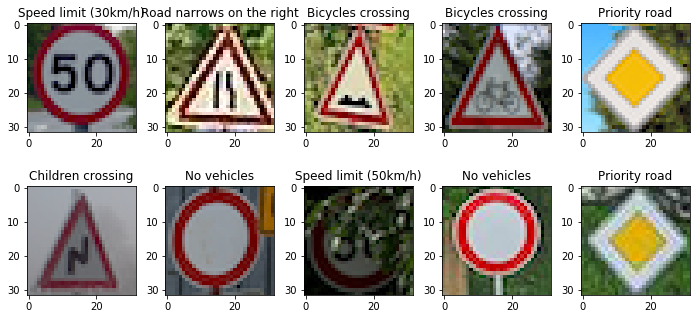

In [27]:
print ("sign labels:", sign_argmax)

n_col = 5
n_row = n_my_images // n_col
if n_my_images % n_col != 0:
    n_row += 1
    
f, axarr = plt.subplots(n_row, n_col, figsize=(12, 5))

for i, sindex in enumerate(sign_argmax):
    #print ("iclass y", iclass, y)
    image = X_my_images[i].squeeze()
    axarr[i // n_col, i % n_col].imshow(image)
    axarr[i // n_col, i % n_col].set_title(signs_names[sindex])

fig.tight_layout()
f.subplots_adjust(hspace=.5)

plt.show()


### Analyze Performance

In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

[ 0.44921583  0.20359589  0.1189938   0.11452392  0.04357669]
[  9.99999523e-01   2.66256478e-07   9.25886425e-08   6.71021141e-08
   5.37541816e-08]
[  9.43076193e-01   3.57802361e-02   2.04503872e-02   6.12491160e-04
   7.92282008e-05]
[  9.99972939e-01   1.36861972e-05   7.42612610e-06   5.34275568e-06
   6.21585059e-07]
[  1.00000000e+00   1.40063184e-19   2.72954607e-22   5.89419198e-23
   4.96565605e-25]
[  9.39501941e-01   4.92099971e-02   6.50445698e-03   4.48037544e-03
   2.35245447e-04]
[  9.99854565e-01   7.67394740e-05   4.12233130e-05   1.54542613e-05
   1.06050402e-05]
[ 0.59929097  0.21967323  0.10496938  0.03707206  0.00987835]
[ 0.60424405  0.19068204  0.11881104  0.08375695  0.00241528]
[  1.00000000e+00   1.87014602e-19   8.63440979e-20   2.25241059e-21
   2.36038770e-22]


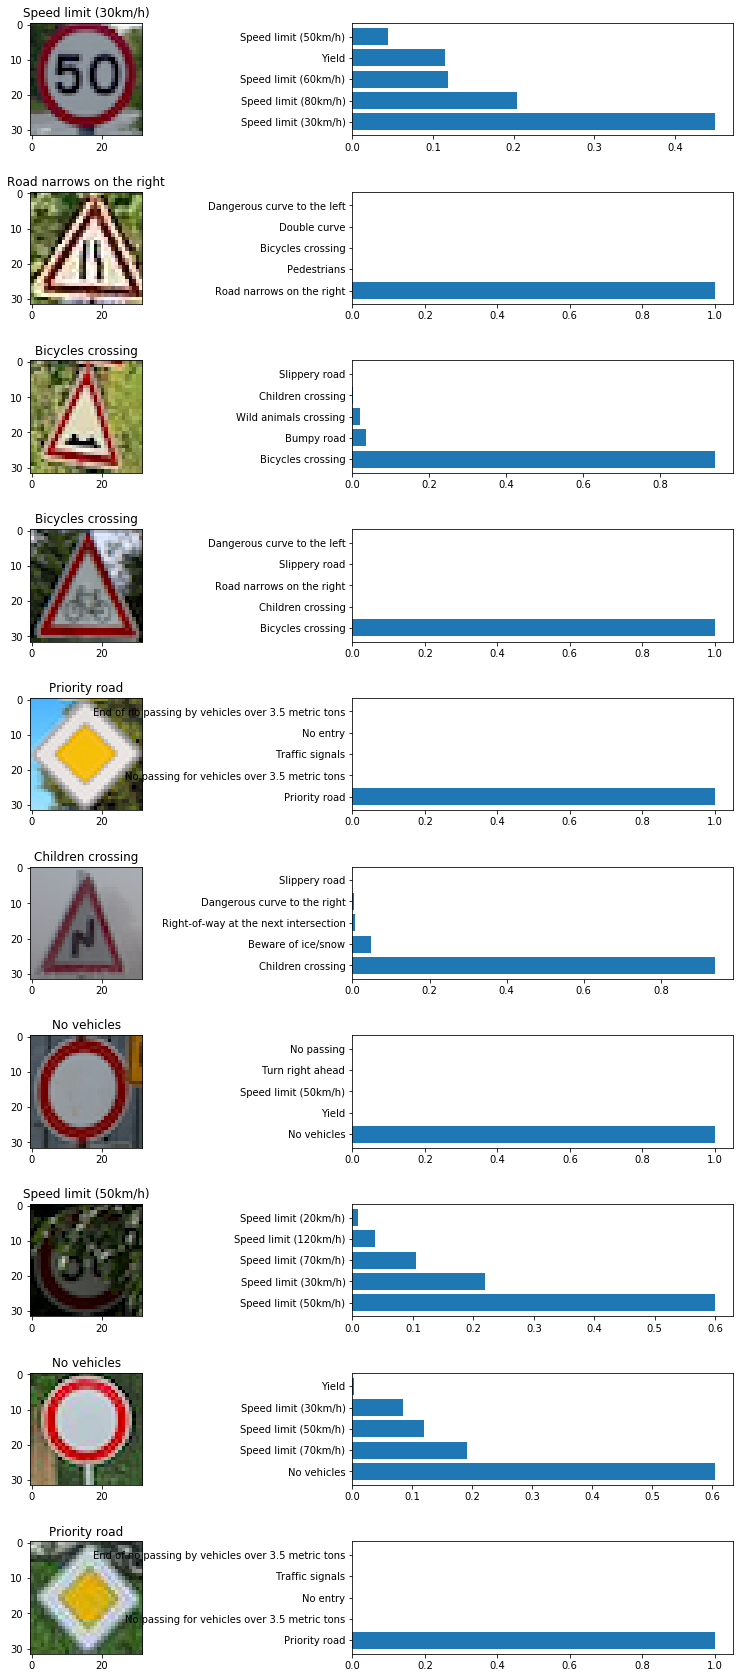

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './lenet')
    predictions = sess.run(tf.nn.softmax(logits), feed_dict={x: X_my_images_norm, keep_prob: 1.0})
    top_5_layer = tf.nn.top_k(predictions, k=5)
    top_5 = sess.run(top_5_layer)
    
#print (top_5)
#print (top_5[0])
    
f, axarr = plt.subplots(n_my_images, 2, figsize=(15, 30))

for i in range(n_my_images):
    #print ("iclass y", iclass, y)
    labels = []
    for j in top_5.indices[i]:
        #print (j)
        labels.append(signs_names[j])
    image = X_my_images[i].squeeze()
    axarr[i, 0].imshow(image)
    axarr[i, 0].set_title(signs_names[top_5.indices[i, 0]])
    axarr[i, 1].barh(np.arange(1, 6, 1), top_5.values[i, :], tick_label=labels)
    print (top_5.values[i, :])

    #axarr[i, 1].yaxis.set_yticks(np.arange(1, 6, 1), labels)
    #axarr[i, 1].xaxis.set_xticks(np.arange(0, 1.0, .2))

#fig.tight_layout()
f.subplots_adjust(hspace=.5)

plt.show()


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


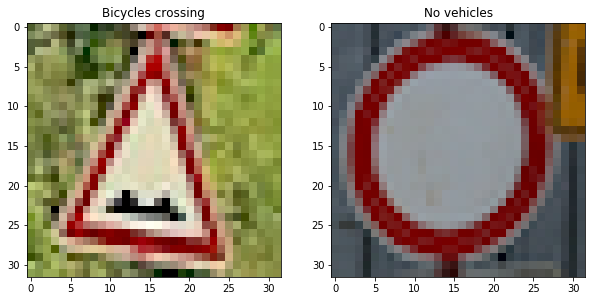

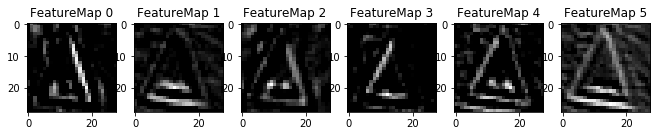

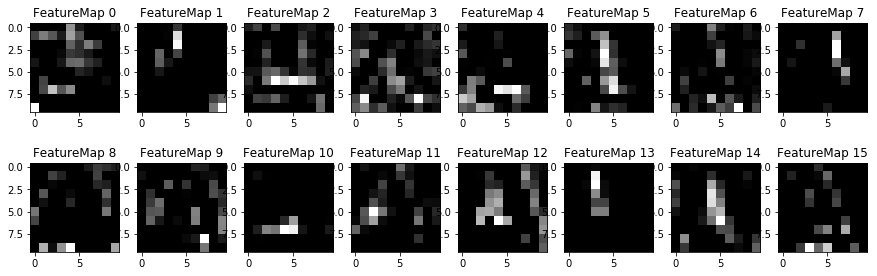

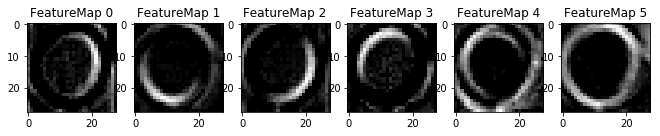

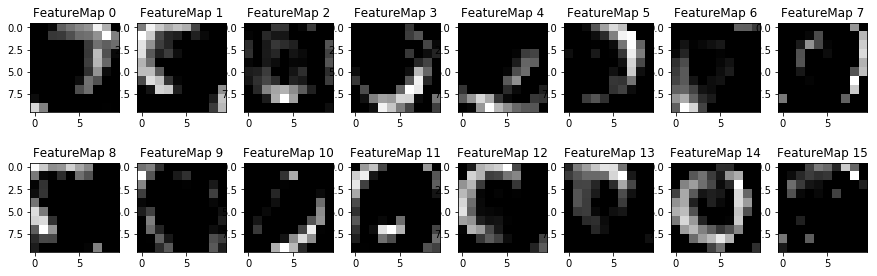

In [30]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")



f, axarr = plt.subplots(1, 2, figsize=(10, 10))

image = X_my_images[2].squeeze()
axarr[0].imshow(image)
axarr[0].set_title(signs_names[sign_argmax[2]])
image = X_my_images[6].squeeze()
axarr[1].imshow(image)
axarr[1].set_title(signs_names[sign_argmax[6]])
#f.subplots_adjust(hspace=.5)

plt.show()


with tf.Session() as sess:
    saver.restore(sess, './lenet')
    img = X_my_images_norm[2].reshape(1,32,32,3)
    outputFeatureMap(img, logit_config['conv_l1'])
    plt.show()
    img = X_my_images_norm[2].reshape(1,32,32,3)
    outputFeatureMap(img, logit_config['conv_l3'])
    plt.show()
    #img = X_my_images_norm[2].reshape(1,32,32,3)
    #outputFeatureMap(img, logit_config['full_l5'])
    #plt.show()

    img = X_my_images_norm[6].reshape(1,32,32,3)
    outputFeatureMap(img, logit_config['conv_l1'])
    plt.show()
    img = X_my_images_norm[6].reshape(1,32,32,3)
    outputFeatureMap(img, logit_config['conv_l3'])
    plt.show()
